# Graph Theory : Reading a novel (one day at a time)

This is a study on Graph Theory
It focuses on unterstanding graphs and getting used to building them

If you're reading this as a way to understand graph theory, try doing it yourself by understanding the concept behind it - By creating something of your own, you create an emotional connection with the material, increasing the knowledge absorption

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

[NetworkX documentation](https://networkx.org/documentation/networkx-1.9.1/reference/introduction.html)

In [ ]:
Graph = nx.Graph()

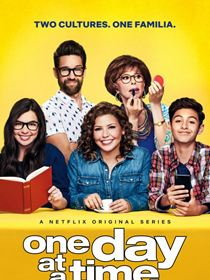

In [ ]:
Graph.add_node("Elena")
Graph.add_node("Schneider")
Graph.add_node("Alex")
Graph.add_node("Lydia")
Graph.add_node("Penelope")

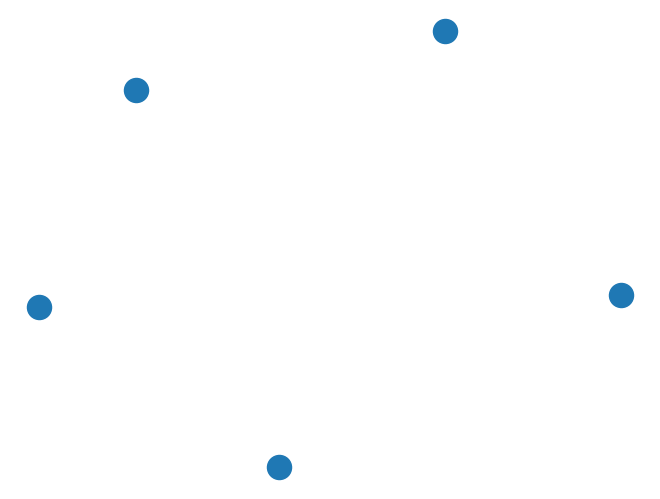

In [ ]:
nx.draw(Graph)

# relationships - literally

In [ ]:
nx.nodes(Graph)

NodeView(('Elena', 'Schneider', 'Alex', 'Lydia', 'Penelope'))

In [ ]:
Graph.add_edge('Lydia','Penelope',relationship="parent/child")

In [ ]:
nx.edges(Graph)["Lydia","Penelope"]

{'relationship': 'parent/child'}

In [ ]:
Graph.add_edge('Alex','Penelope',relationship="parent/child")
Graph.add_edge('Elena','Penelope',relationship="parent/child")

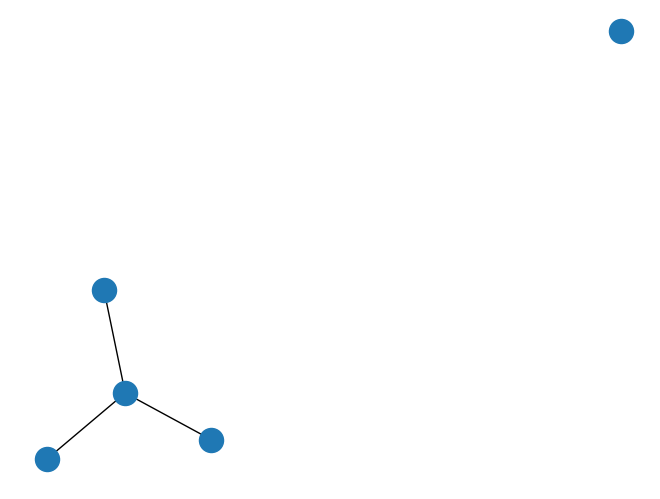

In [ ]:
nx.draw(Graph)

Difficulties:

*   not possible to specify how one node connects to another because it is undirected (for example: what kind of relationship one node has with the other - son/mother/daugther/etc.)
*   With only a undirected graph, a lot of information appear already presentable: (attributes of nodes["actor/actress","name","birth","eye color"],attributes of edges["undirected relationship","conversations","shared interests"]. This multitude of aspects that can be incorporated seems complex and not always relevant
*   Because it is an undirected graph, it does not allow for multiple connections, and that made me sad ;c - That's because I was only able to map out the genealogical relationship between the caracthers and - It resulted on lost of context/data (the friend/community relationship between schneider and the other caracthers) || Maybe this means that the best graph for describing the relationship between the characters would be a MultiGraph that is also Directional





In [ ]:
Graph2 = nx.DiGraph()

In [ ]:
Graph2.add_node("Elena")
Graph2.add_node("Schneider")
Graph2.add_node("Alex")
Graph2.add_node("Lydia")
Graph2.add_node("Penelope")

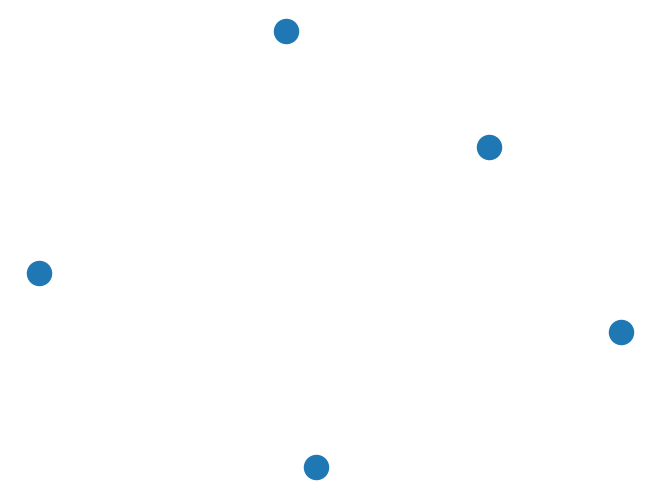

In [ ]:
nx.draw(Graph2)

In [ ]:
nx.nodes(Graph2)

NodeView(('Elena', 'Schneider', 'Alex', 'Lydia', 'Penelope'))

In [ ]:
Graph2.add_edge('Lydia','Penelope',relationship="parent/child")

In [ ]:
nx.edges(Graph2)["Lydia","Penelope"]

{'relationship': 'parent/child'}

In [ ]:
nx.edges(Graph2)

OutEdgeView([('Lydia', 'Penelope')])

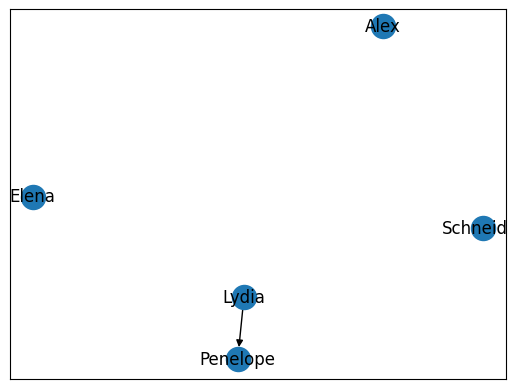

In [ ]:
nx.draw_networkx(Graph2)

In [ ]:
Graph2.add_edge('Penelope','Elena',relationship="parent/child")

In [ ]:
Graph2.add_edge('Penelope','Alex',relationship="parent/child")

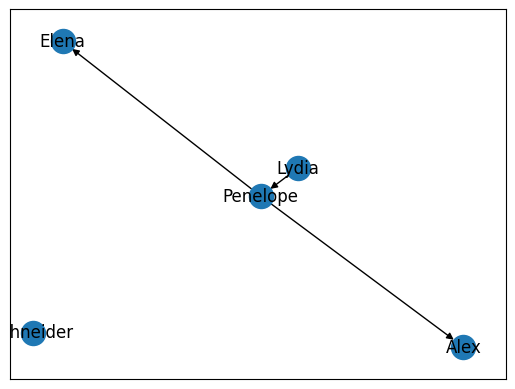

In [ ]:
nx.draw_networkx(Graph2)

In [63]:
Graph3 = nx.MultiDiGraph()

In [64]:
Graph3.add_node("Elena")
Graph3.add_node("Schneider")
Graph3.add_node("Alex")
Graph3.add_node("Lydia")
Graph3.add_node("Penelope")

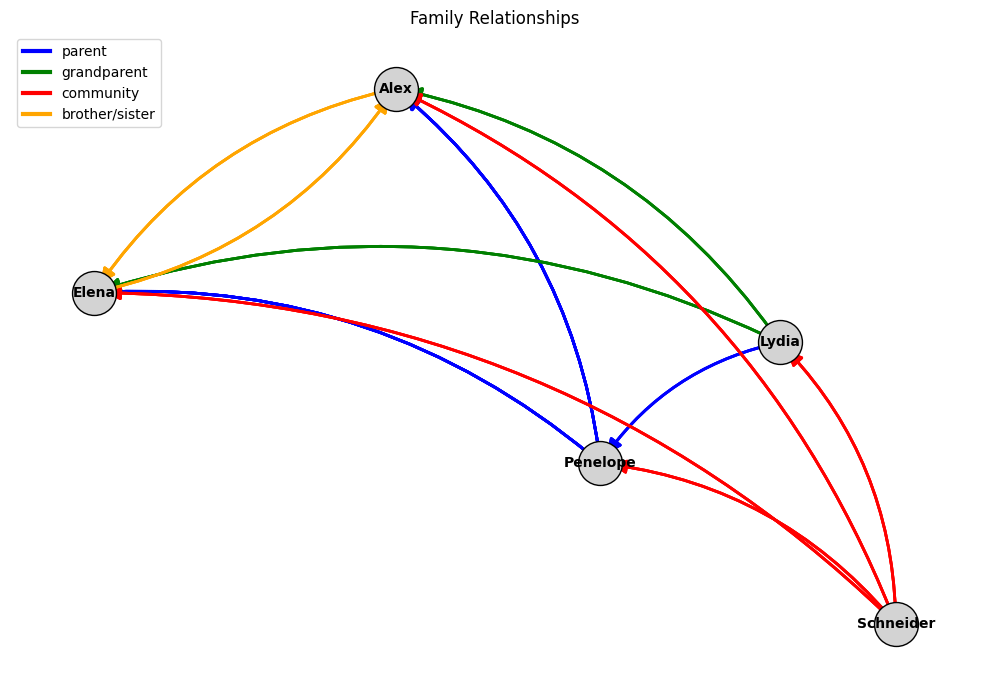

In [67]:
# Add edges with relationships as attributes
Graph3.add_edges_from([
    ('Lydia', 'Penelope'),
    ('Penelope', 'Alex'),
    ('Penelope', 'Elena')
], relationship="parent")

Graph3.add_edges_from([
    ('Lydia', 'Alex'),
    ('Lydia', 'Elena')
], relationship="grandparent")

Graph3.add_edges_from([
    ('Schneider','Lydia'),
    ('Schneider','Penelope'),
    ('Schneider','Elena'),
    ('Schneider','Alex')
], relationship="community")

Graph3.add_edges_from([
    ('Penelope', 'Alex'),
    ('Penelope', 'Elena')
], relationship="parent")

Graph3.add_edges_from([
    ('Elena', 'Alex'),
    ('Alex', 'Elena')
], relationship="brother/sister")

# Define relationship colors
relationship_colors = {
    "parent": "blue",
    "grandparent": "green",
    "community": "red",
    "brother/sister":"orange"
}

# Draw the graph
pos = nx.spring_layout(Graph3)
plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(Graph3, pos, node_size=1000, node_color="lightgrey", edgecolors='black')
nx.draw_networkx_labels(Graph3, pos, font_size=10, font_weight='bold')
# Draw each relationship type with its color
for rel_type, color in relationship_colors.items():
    rel_edges = [(u, v, k) for u, v, k, d in Graph3.edges(keys=True, data=True) if d['relationship'] == rel_type]
    nx.draw_networkx_edges(Graph3, pos, edgelist=rel_edges, edge_color=color, connectionstyle='arc3,rad=0.2', width=2,arrows=True,arrowstyle='-|>',arrowsize=20)

# Create legend
for rel_type, color in relationship_colors.items():
    plt.plot([], [], color=color, label=rel_type, linewidth=3)
plt.legend(loc="upper left")

plt.title("Family Relationships")
plt.axis("off")
plt.tight_layout()
plt.show()